# Regressão Linear

## Motivação

Modelos lineares são conhecidos há muito tempo. Antes de serem adotados na ciência de dados e colocados nos programas de inúmeras áreas de treinamento e nos primeiros capítulos de muitos livros, eles têm sido um elemento relevante do corpo do conhecimento da estatística, da economia e de muitos outros campos quantitativos.

É claro que estamos bem cientes das limitações dos modelos lineares, no entanto, as seguintes vantagens de um modelo linear não podem ser facilmente ignorados:

* É um bom ponto de partida para tarefas de regressão;
* É fácil de explicar como funciona;
* É rápido de treinar, não importa a quantidade de dados que você precisa processar;
* É rápido, flexível e fácil de implementar em qualquer ambiente de produção;
* É escalável para resposta em tempo real.

Às vezes, mesmo quando a situação permite a introdução de modelos mais complexos e de maior desempenho, outros fatores ainda podem favorecer a adoção de soluções mais simples, porém menos eficazes.Na verdade, o melhor modelo nem sempre é necessariamente o mais eficiente. 

Dependendo do problema e do contexto da aplicação, questões como facilidade de implementação em sistemas de produção, escalabilidade para volumes crescentes de dados e desempenho em configurações em tempo real, podem redefinir profundamente a importância do papel do desempenho preditivo na escolha das melhores solução.

Sob tais premissas, é recomendável testar as soluções mais diretas primeiro, e seguir o princípio da navalha de Occam, tanto quanto possível, favorecendo modelos mais simples contra os mais complexos, quando suas performances são comparáveis.

## Introducão

Nesta seção, começaremos com uma descrição rápida e intuitiva da origem histórica do termo regressão e, em seguida, mostraremos, também de maneira intuitiva, por que utilzar uma reta para modelar o problema. Finalmente, a regressão linear é definida e sua formalização matemática é delineada.

#### Origem Histórica do Termo Regressão

O termo regressão foi introduzido por Francis Galton. Em um artigo famoso, Galton descobriu que, embora houvesse uma tendência de os pais altos terem filhos altos e de os pais baixos terem filhos pequenos, a altura média das crianças nascidas de pais de uma determinada altura tendia a se mover ou **"regredir"** em direção a altura média da população como um todo.

Em outras palavras, a altura dos filhos de pais incomumente altos ou incomumente baixos tende a se mover em direção à altura média da população. A lei de Galton da regressão universal foi confirmada por seu amigo Karl Pearson, que coletou mais de mil registros de altura de membros de grupos familiares.

Ele descobriu que a altura média dos filhos de um grupo de pais altos era menor do que a altura de seus pais e a altura média dos filhos de um grupo de pais baixos era maior do que a altura de seus pais, **"regredindo"** tanto os filhos altos quanto os baixos para a altura média de todos os homens. ("regression toward the mean")

#### Intuição do uso do modelo linear

As cruzes circuladas na figura indicam a altura média dos filhos correspondentes a uma determinada altura do pai. Conectando estas médias, obtemos a linha mostrada abaixo. Esta linha é conhecida como a **linha de regressão**. A figura abaixo mostra como a altura média dos filhos aumenta com a altura do pai.

[imagem](https://drive.google.com/file/d/12P_49Z2LCGqU8Wu0QnNDh2jDPfo9ljg5/view?usp=sharing)

#### Definição de Regressão Linear

No caso mais simples de regressão linear, queremos determinar a equação de uma linha que melhor se adapta ao conjunto de dados. Como assumimos que a relação entre a variável dependente e independente é linear, a equação segue o formato:

\begin{align}
y_i = \mbox{E}(Y_i) + \epsilon_i = \beta_0 + \beta_1x_i + \epsilon_i
\end{align}

onde $\beta_1$ é comumente conhecido como *slope* (inclinação), e $\beta_0$ é comumente conhecido como *intercept* (intercepto) ou *bias*.

Ao procurar sumarizar a relação entre um preditor x e uma resposta y, estamos interessados em conhecer a linha de regressão populacional $y_i = \beta_0 + \beta_1x_i + \epsilon_i$. A única maneira pela qual poderíamos saber, no entanto, é coletando dados sobre toda a população - na maioria das vezes uma tarefa impossível. Desta forma, é mais viável coletar e usar uma amostra da população para estimar a linha de regressão da população:

\begin{align}
\hat{y}_i=b_0+b_1x_i + e_i
\end{align}

## Experimento Controlado

Com o intuito de entendermos o mecanismo de funcionamento do modelo de regressão linear simples, construiremos um experimento controlado. Esta abordagem permite-nos examinar os detalhes e eficiência do modelo utilizado.

Nós começamos com as importações padrão:

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl

import seaborn as sns; sns.set()
import pandas as pd
import numpy as np

import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

from matplotlib import rcParams
rcParams['figure.figsize'] = (8, 4)
rcParams['figure.dpi'] = 100
rcParams['font.size'] = 8
rcParams['font.family'] = 'sans-serif'
rcParams['lines.linewidth'] = 2.0

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#### Regressão linear Simples

Considere os seguintes dados, que estão espalhados sobre uma linha com uma inclinação de 2 e um intercepto de -5:

\begin{align}
Y = -5 + 2X + e
\end{align}

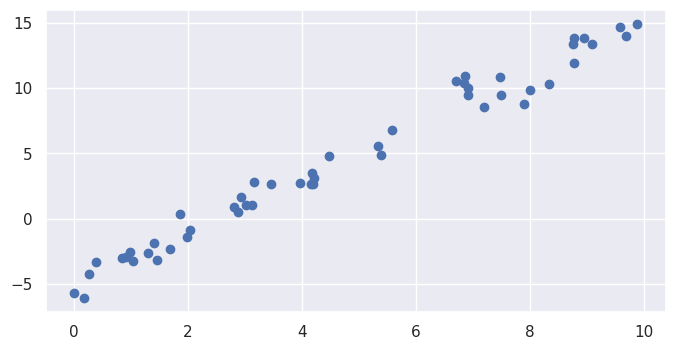

In [4]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = 2 * x - 5 + rng.randn(50)
plt.scatter(x, y)

Qual linha (parâmetros) melhor se ajusta aos dados?

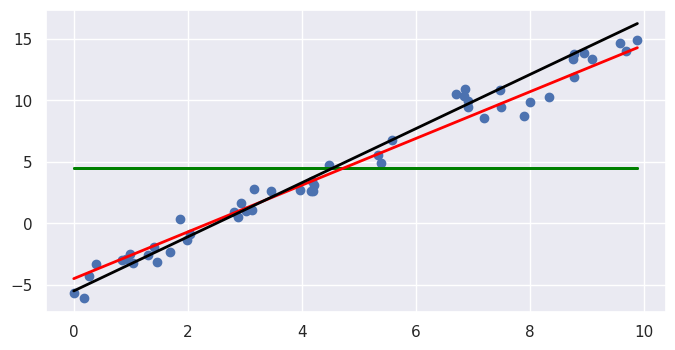

In [5]:
l1 = lambda x: 1.9*x-4.5
l2 = lambda x: 2.2*x-5.5
figs, ax = plt.subplots(1,1)
plt.scatter(x, y)
ax.plot(x,np.repeat(y.mean(),y.shape[0]),color='green')
ax.plot(np.sort(x),l1(x)[x.argsort()],color='red')
ax.plot(np.sort(x),l2(x)[x.argsort()],color='black')

#### Qual é a "Melhor Reta de Regressão"?

Para examinar qual linha é mais adequada, primeiro precisamos introduzir algumas notações:

* $y_i$  denota o valor observado no experimento (variável dependente);
* $x_i$  denota o valor da variável preditora no experimento (variável independente);
* $\hat{y}_i$ denota o valor predito no experimento.

Então, a equação para a linha que representa o melhor ajuste é:

\begin{align}
\hat{y}_i=b_0+b_1x_i
\end{align}

Claramente, nossa previsão não será perfeitamente correta - tem algum "erro de previsão" (ou "erro residual") $e_i$.

Em geral, quando usamos $\hat{y}_i = b_0 + b_1x_i$ para prever a resposta real $y_i$, cometemos um erro de previsão (ou erro residual) de tamanho:

\begin{align}
e_i=y_i-\hat{y}_i
\end{align}

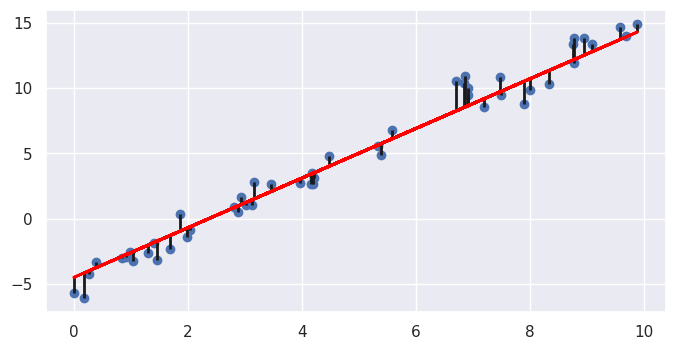

In [6]:
fig, ax = plt.subplots()
ax.plot(x,l1(x), color='red')
ax.scatter(x,y)
ax.vlines(x,y,l1(x))

Uma linha que melhor se ajusta aos dados será aquela para a qual os $n$ erros de previsão - um para cada ponto de dados observado - são tão pequenos quanto possível em algum sentido geral. 

Uma maneira de atingir esse objetivo é invocar o critério de mínimos quadrados, que "minimiza a soma dos erros de predição quadráticos". Isso é:

\begin{align}
Q=\sum_{i=1}^{n}(y_i-\hat{y}_i)^2
\end{align}


In [8]:
#calculo do erro para cada linha
conc = np.concatenate((x.reshape(len(x),-1),\
                       y.reshape(len(y),-1),\
                       l1(x).reshape(len(l1(x)),-1),\
                       ((l1(x)-y)**2).reshape(len((l1(x)-y)**2),-1),\
                       l2(x).reshape(len(l2(x)),-1),\
                       ((l2(x)-y)**2).reshape(len((l2(x)-y)**2),-1) ), axis=-1)

df_l = pd.DataFrame(conc, columns=['x','y','L1', '(y-L1)²', 'L2', '(y-L2)²'])

In [9]:
df_l.head()

,x,y,L1,(y-L1)²,L2,(y-L2)²
0,4.170220,2.653267,3.423418,0.593132,3.674484,1.042884
1,7.203245,8.561284,9.186165,0.390476,10.347139,3.189277
2,0.001144,-5.668959,-4.497827,1.371550,-5.497484,0.029404
3,3.023326,1.033987,1.244319,0.044240,1.151317,0.013766
4,1.467559,-3.182193,-1.711638,2.162530,-2.271370,0.829597


In [10]:
print('Resíduo L1 = {:.3f}'.format(df_l.iloc[:,3].sum()))
print('Resíduo L2 = {:.3f}'.format(df_l.iloc[:,5].sum()))

Resíduo L1 = 48.913
Resíduo L2 = 59.495


Se usássemos a abordagem acima para encontrar a equação da linha que minimiza a soma quadrada dos erros de previsão, teríamos que implementar o procedimento acima para um número infinito de linhas possíveis - claramente, uma tarefa impossível!

Felizmente, alguém fez algum trabalho sujo para nós, descobrindo fórmulas para o intercepto $b_0$ e a inclinação $b_1$ para a equação da linha que minimiza a soma dos erros de predição quadráticos.

As fórmulas são determinadas usando métodos de cálculo. Minimizamos a equação para a soma dos erros de previsão quadráticos:

\begin{align}
Q=\sum_{i=1}^{n}(y_i-(b_0+b_1x_i))^2
\end{align}

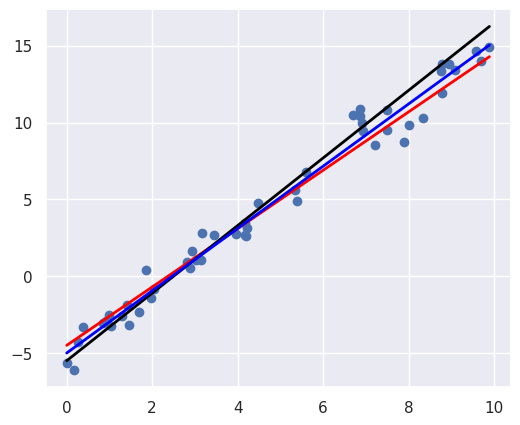

In [11]:
l3 = lambda x: 2.027*x-4.999
figs, ax = plt.subplots(1,1,figsize=(6,5))
plt.scatter(x, y)
ax.plot(np.sort(x),l1(x)[x.argsort()],color='red')
ax.plot(np.sort(x),l2(x)[x.argsort()],color='black')
ax.plot(np.sort(x),l3(x)[x.argsort()],color='blue')

In [12]:
print('Resíduo L3 = {:.3f}'.format(np.sum((l3(x)-y)**2)))

Resíduo L3 = 40.917


Utilizamos bibliotecas como Scikit-learn ou Statsmodels para calcular esses coeficientes.

#### Scikit-learn

Podemos usar o Scikit-Learn para ajustar a linha com o melhor ajuste:

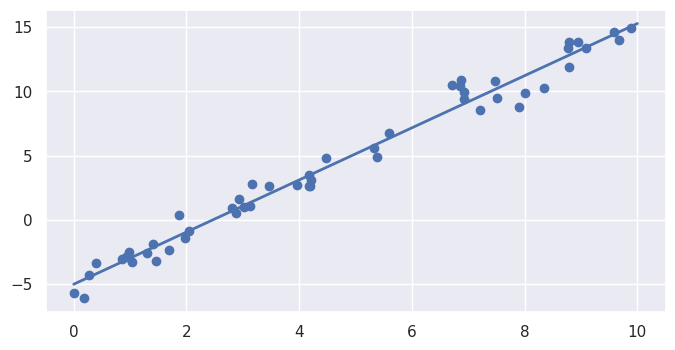

In [13]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)

model.fit(x[:, np.newaxis], y)

xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit);

In [14]:
print("Model inclinação:      {:.3f}".format(model.coef_[0]))
print("Model intercepto:     {:.3f}".format(model.intercept_))

Model inclinação:      2.027
Model intercepto:     -4.999


#### Statsmodels

O gráfico a seguir representa nossa linha de melhor ajustte (verde), as observações (pontos) e nosso intervalo de confiança (vermelho).

In [15]:
X = sm.add_constant(x)
model = sm.OLS(y, X)
results = model.fit()

In [16]:
print("Model slope:      {:.3f}".format(results.params[1]))
print("Model intercept: {:.3f}".format(results.params[0]))

Model slope:      2.027
Model intercept: -4.999


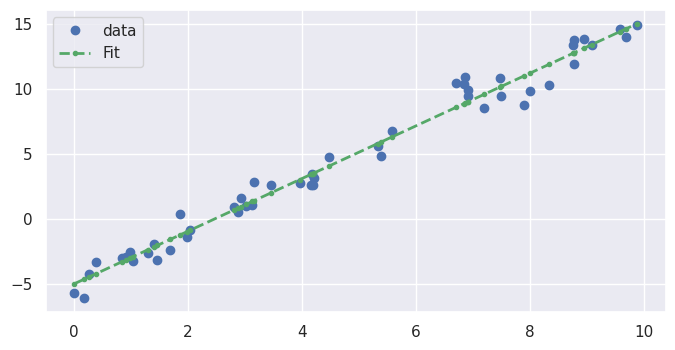

In [20]:
prstd = wls_prediction_std(results)

figs, ax = plt.subplots(1,1)

ax.plot(x, y, 'o', label="data")
ax.plot(np.sort(x), results.fittedvalues[x.argsort()], 'g--.', label="Fit")
ax.legend(loc='best');

## Avaliando o Desempenho do Modelo

\begin{align}
r^2=1-\frac{\sum_{i=1}^{n}(y_i-\hat{y}_i)^2}{\sum_{i=1}^{n}(y_i-\bar{y})^2}
\end{align}

\begin{align}
MSE=\frac{\sum_{i=1}^{n}(y_i-\hat{y}_i)^2}{n}
\end{align}

\begin{align}
MAPE=\frac{1}{n}\sum_{i=1}^{n}\frac{|y_i-\hat{y}_i|}{y_i}
\end{align}


In [22]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_percentage_error

In [23]:
mse_l1 = mean_squared_error(y, l1(x))
r2_l1 = r2_score(y, l1(x))
mape_l1 = mean_absolute_percentage_error(y,l1(x))

mse_l2 = mean_squared_error(y, l2(x))
r2_l2 = r2_score(y, l2(x))
mape_l2 = mean_absolute_percentage_error(y,l2(x))

mse_l3 = mean_squared_error(y, l3(x))
r2_l3 = r2_score(y, l3(x))
mape_l3 = mean_absolute_percentage_error(y,l3(x))

In [24]:
print("R2 l1:      {:.3f}".format(r2_l1))
print("R2 l2:      {:.3f}".format(r2_l2))
print("R2 l3:      {:.3f}".format(r2_l3))

R2 l1:      0.975
R2 l2:      0.970
R2 l3:      0.979


In [25]:
print("MSE l1:      {:.3f}".format(mse_l1))
print("MSE l2:      {:.3f}".format(mse_l2))
print("MSE l3:      {:.3f}".format(mse_l3))

MSE l1:      0.978
MSE l2:      1.190
MSE l3:      0.818


In [26]:
print("MAPE l1:      {:.3f}".format(mape_l1))
print("MAPE l2:      {:.3f}".format(mape_l2))
print("MAPEE l3:      {:.3f}".format(mape_l3))

MAPE l1:      0.245
MAPE l2:      0.271
MAPEE l3:      0.240


## Avaliação do Modelo

Como avaliamos um modelo? Como sabemos se o modelo que estamos usando é bom? Uma maneira de considerar essas questões é avaliar se as suposições subjacentes ao modelo de regressão linear simples parecem razoáveis quando aplicadas ao conjunto de dados em questão. Como as suposições se relacionam com os erros de predição (população), fazemos isso através do estudo dos erros estimados (amostra), os resíduos.

### Resíduos X Curva Ajustada

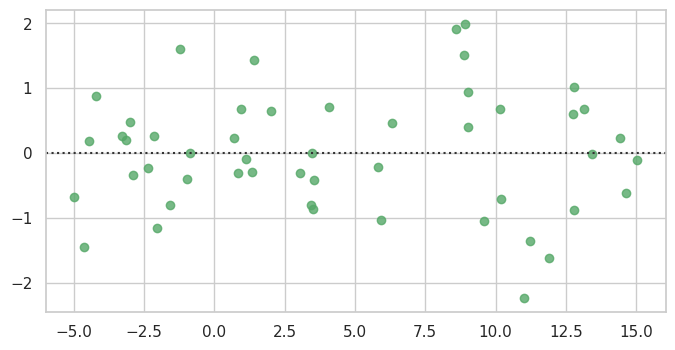

In [20]:
sns.set(style="whitegrid")

# Plot the residuals after fitting a linear model
sns.residplot(l3(x), y, color="g")

* Os resíduos "estão dispostos aleatoriamente" em torno da linha 0. Isso sugere que a suposição de que o relacionamento é linear é razoável.
* Os resíduos formam aproximadamente uma "faixa horizontal" ao redor da linha 0. Isso sugere que as variações dos termos de erro são iguais.
* Nenhum resíduo "se destaca" do padrão aleatório básico de resíduos. Isso sugere que não há outliers.

### Regressão Linear Multipla

A regressão múltipla é um método usado para examinar a relação entre uma variável dependente $y_i$ é uma ou mais variáveis independentes $x_i$. A equação segue o formato:

\begin{align}
y_i = \beta_0 + \beta_1x_i + \cdots + \beta_nx_i + \epsilon_i 
\end{align}

Usaremos o conjunto de dados da cidade de Boston, um conjunto de dados a qual tentaremos explicar os preços de casas na Boston dos anos 70.

In [27]:
from sklearn.datasets import load_boston

In [28]:
boston = load_boston()
dataset = pd.DataFrame(boston.data, columns=boston.feature_names)
dataset['target'] = boston.target

In [29]:
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


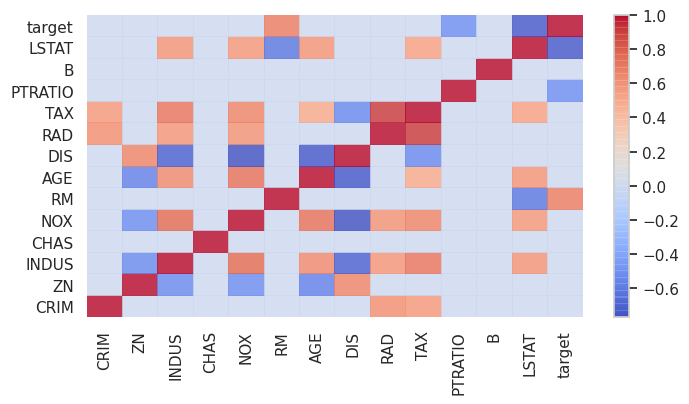

In [26]:
def visualize_correlation_matrix(data, hurdle = 0.0):
    R = np.corrcoef(data, rowvar=0)
    R[np.where(np.abs(R)<hurdle)] = 0.0
    heatmap = plt.pcolor(R, cmap=mpl.cm.coolwarm, alpha=0.8)
    heatmap.axes.set_frame_on(False)
    heatmap.axes.set_yticks(np.arange(R.shape[0]) + 0.5, minor=False)
    heatmap.axes.set_xticks(np.arange(R.shape[1]) + 0.5, minor=False)
    heatmap.axes.set_xticklabels(data.columns, minor=False)
    plt.xticks(rotation=90)
    heatmap.axes.set_yticklabels(data.columns, minor=False)
    plt.tick_params(axis='both', which='True', bottom='True', top='False', left = 'False', right = 'False')
    plt.colorbar()
    plt.show()

visualize_correlation_matrix(dataset, hurdle=0.5)


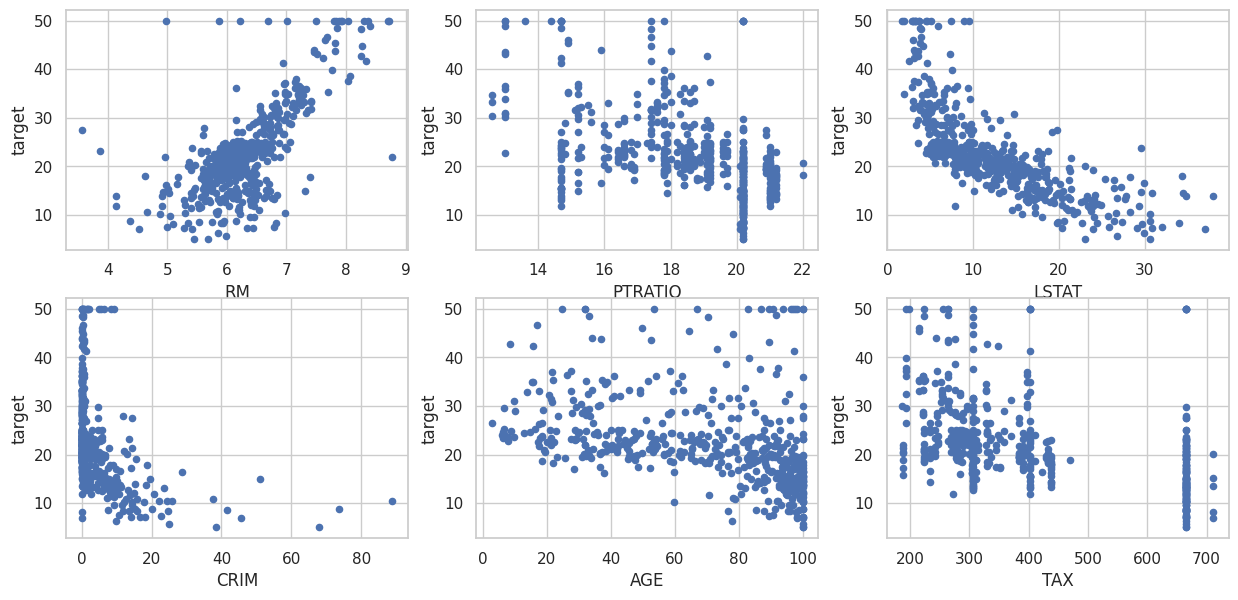

In [27]:
figs, axes = plt.subplots(2,3,figsize=(15,7))
dataset[['RM','target']].plot.scatter(x='RM',y='target',ax=axes[0,0])
dataset[['PTRATIO','target']].plot.scatter(x='PTRATIO',y='target',ax=axes[0,1])
dataset[['LSTAT','target']].plot.scatter(x='LSTAT',y='target',ax=axes[0,2])
dataset[['CRIM','target']].plot.scatter(x='CRIM',y='target',ax=axes[1,0])
dataset[['AGE','target']].plot.scatter(x='AGE',y='target',ax=axes[1,1])
dataset[['TAX','target']].plot.scatter(x='TAX',y='target',ax=axes[1,2])

In [30]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

model.fit(dataset.iloc[:, 0:13], dataset[['target']])

print('y = {:.3f} {:+.3f}x1 {:+.3f}x2 {:+.3f}x3 {:+.3f}x4 {:+.3f}x5 {:+.3f}x6\
           {:+.3f}x7 {:+.3f}x8 {:+.3f}x9 {:+.3f}x10 {:+.3f}x11 {:+.3f}x12 {:+.3f}x13'\
           .format(model.intercept_[0], model.coef_[0,0], model.coef_[0,1], model.coef_[0,2], model.coef_[0,3], model.coef_[0,4]\
                   , model.coef_[0,5], model.coef_[0,6], model.coef_[0,7], model.coef_[0,8], model.coef_[0,9]\
                   , model.coef_[0,10], model.coef_[0,11], model.coef_[0,12]))

y = 36.459 -0.108x1 +0.046x2 +0.021x3 +2.687x4 -17.767x5 +3.810x6           +0.001x7 -1.476x8 +0.306x9 -0.012x10 -0.953x11 +0.009x12 -0.525x13


R2:      0.741
MSE:     21.895
MAPE:     0.164


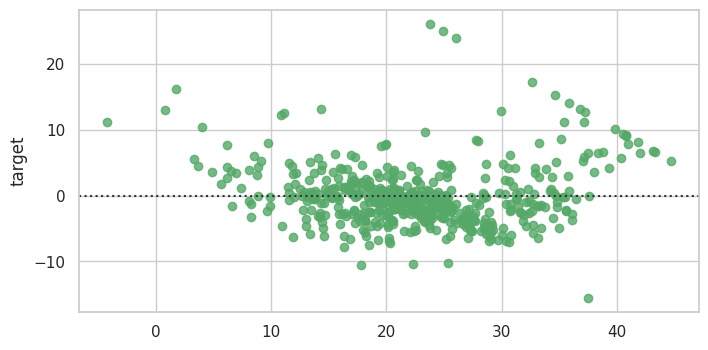

In [31]:
predict = model.predict(dataset.iloc[:, 0:13])

mse = mean_squared_error(dataset[['target']], predict)
r2 = r2_score(dataset[['target']], predict)
mape = mean_absolute_percentage_error(dataset[['target']], predict)

print("R2:      {:.3f}".format(r2))
print("MSE:     {:.3f}".format(mse))
print("MAPE:     {:.3f}".format(mape))

sns.set(style="whitegrid")
sns.residplot(predict, dataset[['target']], color="g")

## Random Forest para Regressão

Neste seção vamos discutir algumas características de ***Regression Trees*** e ***Random Forests***.


Random Forest, em termos gerais, simplesmente estimama a Árvore de Regressão desejada realizando muitas amostras (reamostra os dados muitas vezes com a substituição e reestima o modelo) e faz a previsão final como a média das previsões entre as árvores.

[imagem](https://drive.google.com/file/d/1op8kZW-dJbRyOOKLUAwmJUHh9bN0nGwf/view?usp=sharing)

In [32]:
from sklearn.ensemble import RandomForestRegressor

([<matplotlib.axis.XTick at 0x7fbcae34cb90>,
 [Text(0, 0, 'CRIM'),
  Text(0, 0, 'ZN'),
  Text(0, 0, 'INDUS'),
  Text(0, 0, 'CHAS'),
  Text(0, 0, 'NOX'),
  Text(0, 0, 'RM'),
  Text(0, 0, 'AGE'),
  Text(0, 0, 'DIS'),
  Text(0, 0, 'RAD'),
  Text(0, 0, 'TAX'),
  Text(0, 0, 'PTRATIO'),
  Text(0, 0, 'B'),
  Text(0, 0, 'LSTAT')])

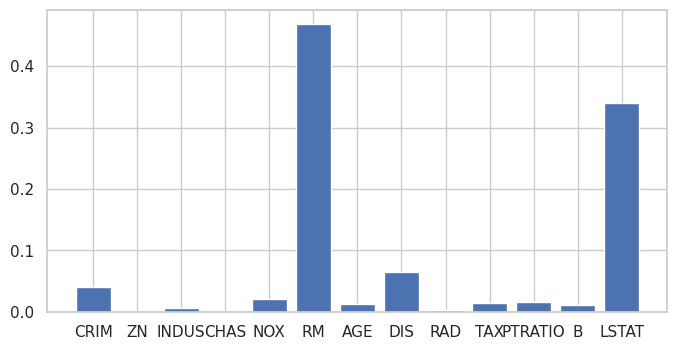

In [33]:
regr = RandomForestRegressor()
regr.fit(dataset.iloc[:, 0:13].values, dataset[['target']].values.reshape(dataset[['target']].shape[0],))

plt.bar(np.arange(1, 14), regr.feature_importances_)
plt.xticks(np.arange(1, 14), dataset.columns)

R2:      0.981
MSE:     1.645
MAPE:     0.042


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


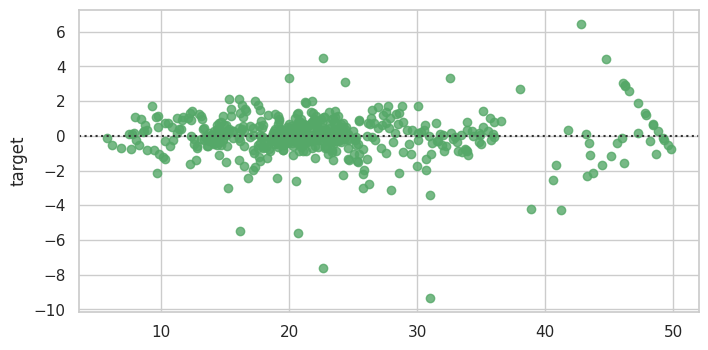

In [34]:
predict = regr.predict(dataset.iloc[:, 0:13])

mse = mean_squared_error(dataset[['target']], predict)
r2 = r2_score(dataset[['target']], predict)
mape = mean_absolute_percentage_error(dataset[['target']], predict)

print("R2:      {:.3f}".format(r2))
print("MSE:     {:.3f}".format(mse))
print("MAPE:     {:.3f}".format(mape))

sns.set(style="whitegrid")
sns.residplot(predict, dataset[['target']], color="g")

## Reference

STAT 501 online course materials website.. 2019. Simple Linear Regression. [ONLINE] Available at: https://newonlinecourses.science.psu.edu/stat501/node/250/. [Accessed 1 May 2019].

stackoverflow. 2019. Python: Plot residuals on a fitted model. [ONLINE] Available at: https://stackoverflow.com/questions/51220918/python-plot-residuals-on-a-fitted-model. [Accessed 3 May 2019].

R bloggers. 2019. How Random Forests improve simple Regression Trees?. [ONLINE] Available at: https://www.r-bloggers.com/how-random-forests-improve-simple-regression-trees/. [Accessed 6 May 2019].

Gujarati, Damodar N, and Dawn C. Porter. Basic Econometrics. Boston, Mass: McGraw-Hill, 2009. Print.

Jake VanderPlas. 2016. Python Data Science Handbook: Essential Tools for Working with Data (1st ed.). O'Reilly Media, Inc.

Massaron, Luca; Boschetti, Alberto. Regression Analysis with Python. Packt Publishing, 2016.